## Лабораторная работа №1 | Вариант 5

Выполнил: Куликова Алёна М8О-313Б-22

### 1. Numpy

In [ ]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [ ]:
matrix = np.eye(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [ ]:
rgba_dtype = np.dtype([('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')])
print(rgba_dtype)

[('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [ ]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [ ]:
vector = np.random.rand(10)
print(vector)

sorted_vector = np.sort(vector)
print(sorted_vector)

[0.38149486 0.400413   0.65757425 0.66567315 0.32599202 0.1292244
 0.71115263 0.8647065  0.86448776 0.69580557]
[0.1292244  0.32599202 0.38149486 0.400413   0.65757425 0.66567315
 0.69580557 0.71115263 0.86448776 0.8647065 ]


5. Создайте read-only массив(неизменяемый)

In [2]:
array = np.array([1, 2, 3])
array.flags.writeable = False

array[0] = 10

NameError: name 'np' is not defined

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [ ]:
matrix = np.random.rand(10, 2)
print(matrix)

x = matrix[:, 0]
y = matrix[:, 1]

r = np.sqrt(x**2 + y**2)

theta = np.arctan2(y, x)

polar = np.column_stack((r, theta))
print(polar)

[[0.8010193  0.58909555]
 [0.96583495 0.1325822 ]
 [0.66358491 0.35759629]
 [0.65267073 0.63587933]
 [0.71868677 0.42669799]
 [0.06677591 0.78482256]
 [0.61239005 0.67598659]
 [0.7295546  0.00192378]
 [0.10272132 0.78334024]
 [0.70462129 0.6322477 ]]
[[0.99431659 0.63411247]
 [0.9748924  0.13641949]
 [0.75380371 0.49426998]
 [0.91121985 0.77236766]
 [0.83581209 0.53578832]
 [0.78765822 1.48591667]
 [0.91212908 0.83471989]
 [0.72955713 0.00263691]
 [0.79004658 1.44040786]
 [0.94669336 0.73131432]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [ ]:
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
grid_x, grid_y = np.meshgrid(x, y)

array = np.zeros(grid_x.shape, dtype=[('x', float), ('y', float)])
array['x'] = grid_x
array['y'] = grid_y

print(array)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [ ]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

C = 1 / (x[:, np.newaxis] - y[np.newaxis, :])

print("x:", x)
print("y:", y)
print("C:\n", C)

x: [-0.73858355 -0.36951279  0.48041081 -1.79392747 -1.31506359]
y: [ 0.96970246  0.10953672  0.5191942   0.58842037 -0.64149033]
C:
 [[ -0.58538207  -1.17907807  -0.79505303  -0.75357728 -10.29938027]
 [ -0.74670595  -2.08746692  -1.12523027  -1.04391417   3.67677425]
 [ -2.04377081   2.69633284 -25.78423685  -9.25843943   0.89134414]
 [ -0.36184295  -0.52535793  -0.43231621  -0.41975399  -0.86772629]
 [ -0.43768157  -0.70195127  -0.54517964  -0.52535247  -1.4846195 ]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [ ]:
arr = np.array([1.9, -2.7, 3.1], dtype=np.float32)
#original_id = id(arr)

arr = arr.astype(np.int32, copy=False)
#converted_id = id(arr)

print(arr)
print(arr.dtype)

[ 1 -2  3]
int32


10. Как случайно заменить p элементов в 2D массиве?

In [ ]:
import numpy as np

array = np.zeros((5, 5))
p = 10

flat_indices = np.random.choice(array.size, size=p, replace=False)

rows, cols = np.unravel_index(flat_indices, array.shape)

array[rows, cols] = -1

print(array)

[[ 0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.]
 [-1. -1.  0.  0. -1.]
 [ 0. -1. -1.  0. -1.]
 [-1.  0.  0.  0. -1.]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")

1. Узнайте сколько было на борту человек

In [5]:
print(len(df))

891


2. Какой медианный и средний возраста пассажиров

In [6]:
print("Медианный возраст:", df['Age'].median())
print("Средний возраст:", df['Age'].mean())


Медианный возраст: 28.0
Средний возраст: 29.69911764705882


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [7]:
children = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]

print("Выживаемость детей:", children['Survived'].mean() * 100, "%")
print("Выживаемость взрослых:", adults['Survived'].mean() * 100, "%")

Выживаемость детей: 59.036144578313255 %
Выживаемость взрослых: 38.193343898573694 %


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [8]:
group1 = df[(df['Sex'] == 'female') | (df['Age'] < 16)]
group2 = df[(df['Sex'] == 'male') & (df['Age'] >= 16)]

print("Женщины и дети:", group1['Survived'].mean() * 100, "%")
print("Взрослые мужчины:", group2['Survived'].mean() * 100, "%")


Женщины и дети: 71.75141242937853 %
Взрослые мужчины: 17.433414043583532 %


5. Зависит ли выживаемость от класса обслуживания?

In [9]:
print(df.groupby('Pclass')['Survived'].mean() * 100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


6. Посчитайте средний возраст умерших женщин и мужчин

In [10]:
dead = df[df['Survived'] == 0]
print(dead.groupby('Sex')['Age'].mean())

Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [11]:
with_family = df[(df['SibSp'] > 0) | (df['Parch'] > 0)]
alone = df[(df['SibSp'] == 0) & (df['Parch'] == 0)]

print("С родственниками:", with_family['Survived'].mean() * 100, "%")
print("Без:", alone['Survived'].mean() * 100, "%")

С родственниками: 50.56497175141242 %
Без: 30.353817504655495 %


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [12]:
print(df.groupby('Survived')['Fare'].mean())

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [13]:
s2 = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]
print("Минимальный возраст:", s2['Age'].min())
print("Максимальный возраст:", s2['Age'].max())

Минимальный возраст: 0.67
Максимальный возраст: 62.0


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [14]:
young = df[(df['Sex'] == 'male') & (df['Age'] < 30)]
old = df[(df['Sex'] == 'male') & (df['Age'] >= 30)]

print("Выживаемость молодых мужчин:", young['Survived'].mean() * 100, "%")
print("Выживаемость старших мужчин:", old['Survived'].mean() * 100, "%")

Выживаемость молодых мужчин: 21.518987341772153 %
Выживаемость старших мужчин: 19.444444444444446 %


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

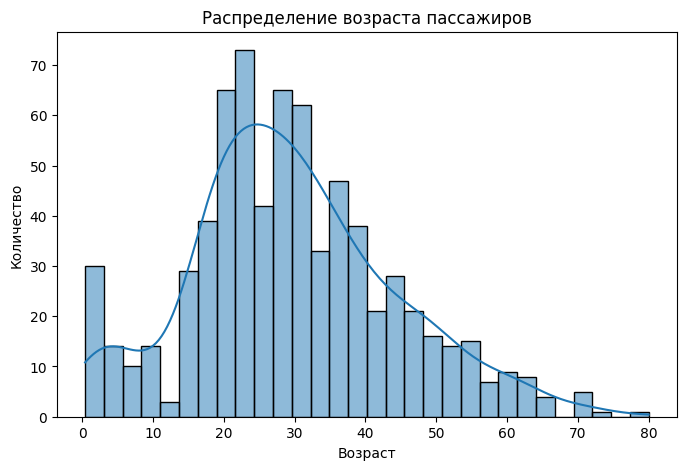

In [16]:
ages = df['Age'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(ages, kde=True, bins=30)
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество")

plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

Максимальная цена билета: 512.3292


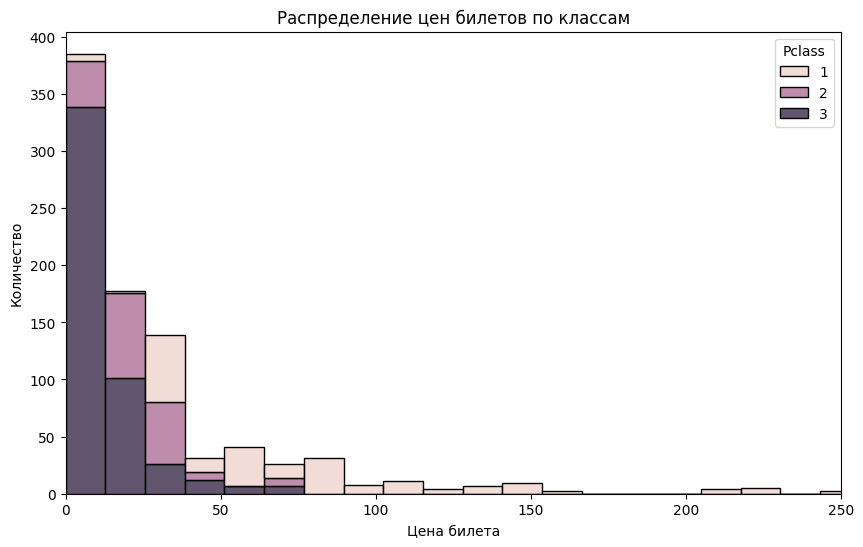

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Pclass', multiple='stack', bins=40)
plt.title("Распределение цен билетов по классам")
plt.xlabel("Цена билета")
plt.ylabel("Количество")

print(f"Максимальная цена билета: {df['Fare'].max()}")
plt.xlim(0, 250)
plt.show()

3. Постройте зависимость цены от возраста пассажира

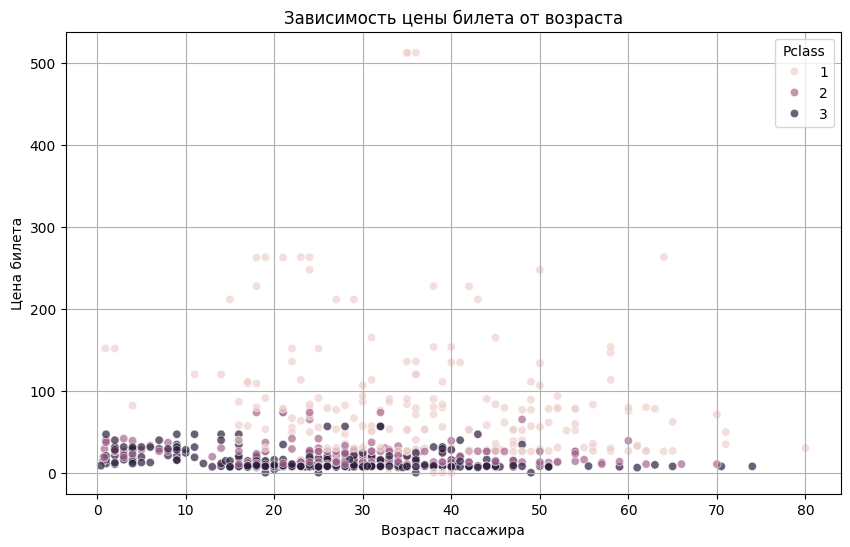

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', alpha=0.7)

plt.title("Зависимость цены билета от возраста")
plt.xlabel("Возраст пассажира")
plt.ylabel("Цена билета")
plt.grid(True)

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

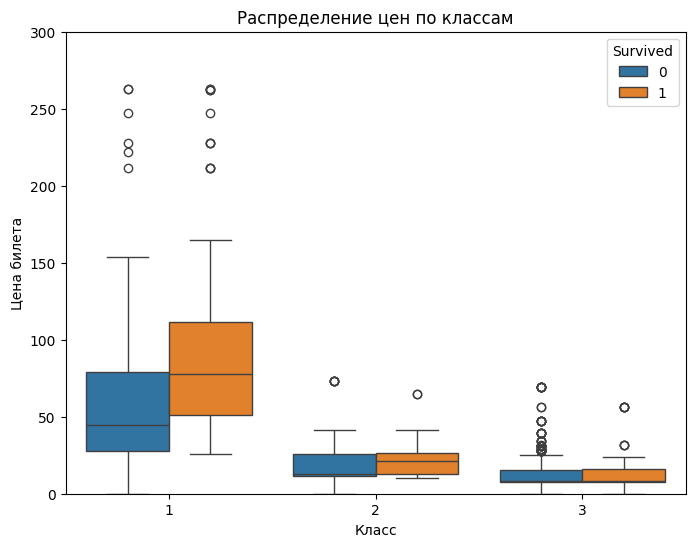

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.title("Распределение цен по классам")
plt.xlabel("Класс")
plt.ylabel("Цена билета")

plt.ylim(0, 300)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

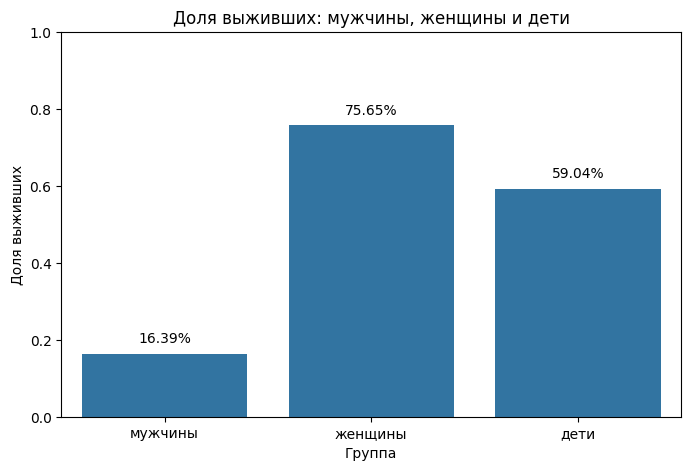

In [22]:
df['group'] = 'мужчины'
df.loc[df['Sex'] == 'female', 'group'] = 'женщины'
df.loc[df['Age'] < 16, 'group'] = 'дети'

grouped = df.groupby('group')['Survived'].mean().reindex(['мужчины', 'женщины', 'дети'])

plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("Доля выживших: мужчины, женщины и дети")
plt.ylabel("Доля выживших")
plt.xlabel("Группа")
plt.ylim(0, 1)

for i, val in enumerate(grouped.values):
    plt.text(i, val + 0.03, f"{val:.2%}", ha='center')

plt.show()


6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

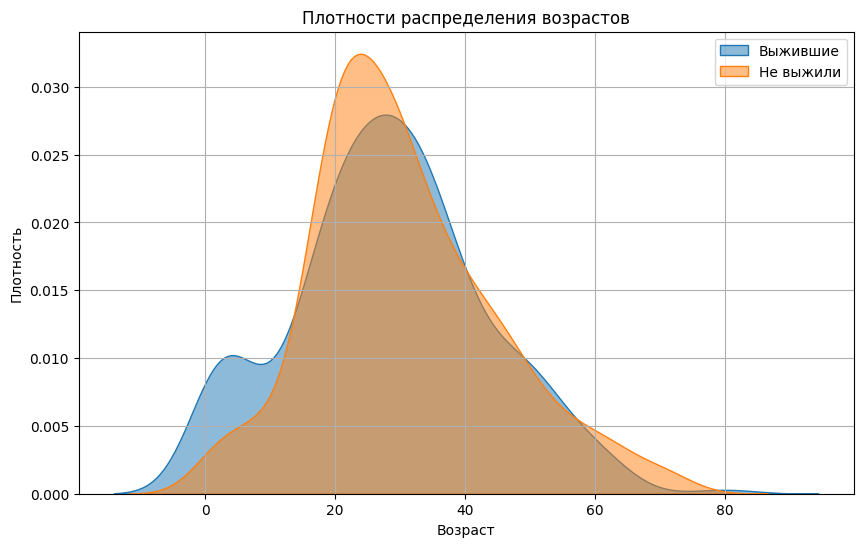

In [23]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), label="Выжившие", fill=True, alpha=0.5)
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), label="Не выжили", fill=True, alpha=0.5)

plt.title("Плотности распределения возрастов")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.legend()

plt.grid(True)
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

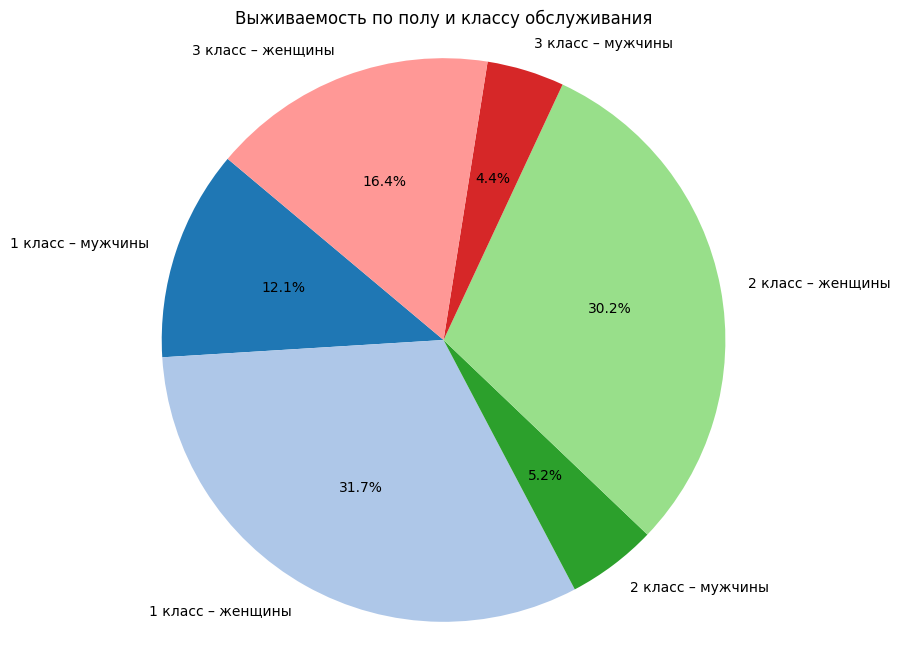

In [24]:
pie_data = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

labels = []
sizes = []
colors = []

color_map = {
    (1, 'male'): '#1f77b4',
    (1, 'female'): '#aec7e8',
    (2, 'male'): '#2ca02c',
    (2, 'female'): '#98df8a',
    (3, 'male'): '#d62728',
    (3, 'female'): '#ff9896',
}

for pclass in sorted(df['Pclass'].unique()):
    for sex in ['male', 'female']:
        key = (pclass, sex)
        label = f"{pclass} класс – {'мужчины' if sex == 'male' else 'женщины'}"
        labels.append(label)
        survived = df[(df['Pclass'] == pclass) & (df['Sex'] == sex)]['Survived'].mean()
        sizes.append(survived)
        colors.append(color_map[key])

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Выживаемость по полу и классу обслуживания")
plt.axis('equal')
plt.show()